### Project outline: 

- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.
- Goal is to predict the **total transaction revenue**. 
- Decide aboute a good evaluation strategy and justify your choice.
- Split dataset into train and test dataset. 
- Choose two supervised learning model of your choice to train on train set. Use proper methods to find the best parameters. Evaluate your method on test data according to evaluation strategy. 
- Choose two unsupervised learning models, clustering, to train on your dataset. Discuss results. 
- Choose two unsupervised learning models, dimentionally reduction, and train it your dataset. Now use the same supervised learning models above on reduced dataset. Can you see any differences? Discuss the result. 
- Use a neural network model on your dataset. Compare the result with other two supervised learning models. Which model performs better? 

### Deliverables:
- Submit IPython notebook. Use markdown to provide an inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization expected. 

### Dataset Description
This is an online Merchandise Store customer dataset. Goal is to predict the total transaction revenue. 
Each row in the dataset is one visit to the store. 

Data Fields
- fullVisitorId- A unique identifier for each user of the Google Merchandise Store.
- channelGrouping - The channel via which the user came to the Store.
- date - The date on which the user visited the Store.
- device - The specifications for the device used to access the Store.
- geoNetwork - This section contains information about the geography of the user.
- sessionId - A unique identifier for this visit to the store.
- socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".
- totals - This section contains aggregate values across the session.
- trafficSource - This section contains information about the Traffic Source from which the session originated.
- visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.
- visitNumber - The session number for this user. If this is the first session, then this is set to 1.
- visitStartTime - The timestamp (expressed as POSIX time).
- hits - This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.
- customDimensions - This section contains any user-level or session-level custom dimensions that are set for a session. This is a repeated field and has an entry for each dimension that is set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import json 
from ast import literal_eval

In [2]:
import sys

maxInt = sys.maxsize  
decrement = True  
while decrement:    
    decrement = False  
    try:  
        csv.field_size_limit(maxInt)  
    except OverflowError:  
        maxInt = int(maxInt/10)  
        decrement = True  

In [3]:
df = pd.read_csv('data.csv',engine='python')

In [4]:
df.head()

,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,trafficSource,visitId,...,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions,totals_visits
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,3162355547410993243,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508198450,...,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,8934116514970143966,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,{'referralPath': '/a/google.com/transportation...,1508176307,...,NaN,2,NaN,2.0,2.0,28.0,NaN,NaN,NaN,1
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,7992466427990357681,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'isTrueDirect': True, 'campaign': '(not set)'...",1508201613,...,NaN,2,1.0,2.0,1.0,38.0,NaN,NaN,NaN,1
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,9075655783635761930,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508169851,...,NaN,2,1.0,2.0,1.0,1.0,NaN,NaN,NaN,1
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,6960673291025684308,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508190552,...,NaN,2,1.0,2.0,1.0,52.0,NaN,NaN,NaN,1


In [5]:
df.columns[:10]

Index(['channelGrouping', 'customDimensions', 'date', 'device',
       'fullVisitorId', 'geoNetwork', 'hits', 'socialEngagementType',
       'trafficSource', 'visitId'],
      dtype='object')

In [6]:
df.iloc[:5, :10]

,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,trafficSource,visitId
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,3162355547410993243,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508198450
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,8934116514970143966,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,{'referralPath': '/a/google.com/transportation...,1508176307
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,7992466427990357681,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'isTrueDirect': True, 'campaign': '(not set)'...",1508201613
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,9075655783635761930,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508169851
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,{'mobileDeviceInfo': 'not available in demo da...,6960673291025684308,"{'cityId': 'not available in demo dataset', 'm...","[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,"{'campaign': '(not set)', 'source': 'google', ...",1508190552


In [7]:
df.iloc[:5,10:-1]

,visitNumber,visitStartTime,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactionRevenue,totals_transactions
0,1,1508198450,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN
1,6,1508176307,NaN,2,NaN,2.0,2.0,28.0,NaN,NaN,NaN
2,1,1508201613,NaN,2,1.0,2.0,1.0,38.0,NaN,NaN,NaN
3,1,1508169851,NaN,2,1.0,2.0,1.0,1.0,NaN,NaN,NaN
4,1,1508190552,NaN,2,1.0,2.0,1.0,52.0,NaN,NaN,NaN


In [8]:
### What's the not-null value ratio in each column in the data?#
df.count()/len(df.index)

channelGrouping                   1.00000
customDimensions                  1.00000
date                              1.00000
device                            1.00000
fullVisitorId                     1.00000
geoNetwork                        1.00000
hits                              1.00000
socialEngagementType              1.00000
trafficSource                     1.00000
visitId                           1.00000
visitNumber                       1.00000
visitStartTime                    1.00000
totals_bounces                    0.49365
totals_hits                       1.00000
totals_newVisits                  0.75440
totals_pageviews                  0.99995
totals_sessionQualityDim          0.45600
totals_timeOnSite                 0.50505
totals_totalTransactionRevenue    0.00965
totals_transactionRevenue         0.00965
totals_transactions               0.00980
totals_visits                     1.00000
dtype: float64

### We are going to flatten those columns with nested data to see the information inside. And append columns that contains usefull information to the original dataframe.And drop the corresponding nested columns in the data.###

In [9]:
 # col_device #
col_device = df['device'].apply(eval).apply(pd.Series)
for col in col_device:
    print(col,col_device[col].unique())

mobileDeviceInfo ['not available in demo dataset']
screenResolution ['not available in demo dataset']
browserSize ['not available in demo dataset']
deviceCategory ['desktop' 'mobile' 'tablet']
mobileDeviceMarketingName ['not available in demo dataset']
operatingSystemVersion ['not available in demo dataset']
operatingSystem ['Windows' 'Chrome OS' 'Android' 'Macintosh' 'iOS' 'Linux' '(not set)'
 'Windows Phone' 'Samsung' 'Tizen' 'BlackBerry' 'OS/2' 'Playstation Vita'
 'Xbox' 'Nintendo Wii' 'Firefox OS']
browserVersion ['not available in demo dataset']
flashVersion ['not available in demo dataset']
mobileInputSelector ['not available in demo dataset']
language ['not available in demo dataset']
mobileDeviceModel ['not available in demo dataset']
browser ['Firefox' 'Chrome' 'Safari' 'UC Browser' 'Internet Explorer' 'Edge'
 'Samsung Internet' 'Android Webview' 'Safari (in-app)' 'Opera Mini'
 'Opera' 'YaBrowser' 'Amazon Silk' 'Mozilla Compatible Agent' 'Puffin'
 'Maxthon' 'BlackBerry' 'ADM' 

In [10]:
df = df.join(col_device[['deviceCategory','operatingSystem','browser','isMobile']])
df = df.drop(['device'],axis=1)

In [11]:
# col_geoNetwork #
col_geoNetwork = df['geoNetwork'].apply(eval).apply(pd.Series)
for col in col_geoNetwork:
    print(col,col_geoNetwork[col].unique())

cityId ['not available in demo dataset']
metro ['not available in demo dataset' 'San Francisco-Oakland-San Jose CA'
 'London' '(not set)' 'JP_KANTO' 'Los Angeles CA' 'Pittsburgh PA'
 'Detroit MI' 'Boston MA-Manchester NH' 'New York NY' 'Seattle-Tacoma WA'
 'Washington DC (Hagerstown MD)' 'San Antonio TX' 'Atlanta GA'
 'Chicago IL' 'Dallas-Ft. Worth TX' 'Philadelphia PA' 'San Diego CA'
 'Austin TX' 'Nashville TN' 'Houston TX' 'Yorkshire' 'Denver CO'
 'Roanoke-Lynchburg VA' 'La Crosse-Eau Claire WI' 'Charlotte NC'
 'Butte-Bozeman MT' 'JP_KINKI' 'Portland OR' 'Phoenix AZ' 'Columbus OH'
 'Minneapolis-St. Paul MN']
subContinent ['Western Europe' 'Northern America' 'Western Asia' 'Central America'
 'Northern Europe' 'Southern Asia' 'Southeast Asia' 'Eastern Europe'
 'South America' 'Eastern Asia' 'Southern Europe' 'Australasia'
 'Central Asia' '(not set)' 'Northern Africa' 'Eastern Africa'
 'Southern Africa' 'Western Africa' 'Caribbean' 'Middle Africa'
 'Melanesia' 'Micronesian Region']
cont

In [12]:
df = df.join(col_geoNetwork['city'])
df.drop('geoNetwork',axis=1,inplace=True)

In [13]:
# col_trafficSource #
col_trafficSource = df['trafficSource'].apply(eval).apply(pd.Series)
for col in col_trafficSource:
    print(col,col_trafficSource[col].unique())

campaign ['(not set)' '"google + redesign/Accessories March 17" All Users'
 'AW - Dynamic Search Ads Whole Site'
 '1000557 | GA | US | en | Hybrid | GDN Text+Banner | AS'
 'Data Share Promo' 'Page: contains "/google+redesign/bags" All Users'
 '1000557 | GA | US | en | Hybrid | GDN Remarketing'
 'Page: contains "/google+redesign/office"'
 'Page: contains "/google+redesign/drinkware"'
 'Page: contains "/google+redesign/bags" 1 Day' 'AW - Electronics'
 'AW - Accessories' 'Smart Display Campaign'
 '"google + redesign/Accessories March 17" All Users Similar Audiences'
 'Page: contains "/google+redesign/drinkware" Similar Audiences'
 'Run of Network Line Item' 'Technology/Technophiles']
source ['google' 'sites.google.com' '(direct)' 'analytics.google.com'
 'blog.golang.org' 'Partners' 'google.com' 'google.co.jp' 'google.co.uk'
 'bing' 'productforums.google.com' 'sashihara.jp' 'qiita.com'
 'youtube.com' 'reddit.com' 'quora.com' 'l.facebook.com'
 'groups.google.com' 'baidu' 'docs.google.com' '

TypeError: unhashable type: 'dict'

#### It seems that there are still some nested columns inside, let's see and decompose if neccessary.

In [14]:
col_trafficSource.head(5)

,campaign,source,adwordsClickInfo,medium,keyword,referralPath,isTrueDirect,adContent
0,(not set),google,{'criteriaParameters': 'not available in demo ...,organic,water bottle,NaN,NaN,NaN
1,(not set),sites.google.com,{'criteriaParameters': 'not available in demo ...,referral,NaN,/a/google.com/transportation/mtv-services/bike...,NaN,NaN
2,(not set),(direct),{'criteriaParameters': 'not available in demo ...,(none),NaN,NaN,True,NaN
3,(not set),google,{'criteriaParameters': 'not available in demo ...,organic,(not provided),NaN,NaN,NaN
4,(not set),google,{'criteriaParameters': 'not available in demo ...,organic,(not provided),NaN,NaN,NaN


In [15]:
df = df.join(col_trafficSource[['campaign','source','keyword','medium','referralPath','isTrueDirect','adContent']])
df = df.drop(['trafficSource'],axis=1)

In [16]:
# col_adwordsClickInfo #
col_adwordsClickInfo = col_trafficSource['adwordsClickInfo'].apply(pd.Series)
for col in col_adwordsClickInfo:
    print(col,col_adwordsClickInfo[col].unique())

criteriaParameters ['not available in demo dataset']
slot [nan 'Top' 'RHS']
page [nan '1' '3' '2']
isVideoAd [nan False]
gclId [nan
 'Cj0KCQjwsZHPBRClARIsAC-VMPBHdNF2oMOgh6Xp6YhjXWSk11sDu3eCo4De_u6l4xafqgrPVPSGYdkaArkiEALw_wcB'
 'CODVoMjJ9tYCFUIvgQod_dsKEA'
 'Cj0KCQjwsZHPBRClARIsAC-VMPA4CVJtDhu1lYkB0AR1hje1goUMHQZNJMrsSWD57pLnv1KE_L7pCEcaAunKEALw_wcB'
 'Cj0KCQjwsZHPBRClARIsAC-VMPDlLD6kS4tmqFGZjMUqyerwe0WDaULaAKNkj-gwuvPnLSPRyf9TN7IaArICEALw_wcB'
 'Cj0KCQjwsZHPBRClARIsAC-VMPBv9X_YKr1Llp3ebjZ8fGYQ3J8k1D-ObeGiyZoQqJkiDw2mlBEOGkQaAnohEALw_wcB'
 'Cj0KCQjwsZHPBRClARIsAC-VMPD0ZYMPmWCxeRqNz_1Vzn67tHxph1HEn1NgAraEHc9drP29fB4dEs0aAjLSEALw_wcB'
 'Cj0KCQjwsZHPBRClARIsAC-VMPAogovYcJ91-Mkr4qWUXIIRcwhT0u86i3SjlvaJXdTE5k-UUntJqMkaAgZFEALw_wcB'
 'EAIaIQobChMIvIzv1OP21gIVUbXACh2KBg8TEAAYASAAEgK2cPD_BwE'
 'Cj0KCQjwsZHPBRClARIsAC-VMPBa-cNbdrXWTLKrPih3XyjxVUwlR4ak6zVNl-EC-YiHFK4s--EVFhYaAkWeEALw_wcB'
 'EAIaIQobChMIqMLDsvb11gIVAgppCh1WAAbDEAAYASAAEgLcjfD_BwE'
 'Cj0KCQjwsZHPBRClARIsAC-VMPBySGDzOjfwp4yC2r7Tv_

TypeError: unhashable type: 'dict'

In [17]:
col_adwordsClickInfo.head()

,criteriaParameters,slot,page,isVideoAd,gclId,adNetworkType,targetingCriteria
0,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN
1,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN
2,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN
3,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN
4,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df = df.join(col_adwordsClickInfo[['slot','page','isVideoAd']])

In [19]:
### col_customD ###
def first_ele(x):
    if len(x):
        return x[0]

In [20]:
col_cusD = df['customDimensions'].apply(eval).apply(first_ele).apply(pd.Series)
for col in col_cusD:
    print(col,col_cusD[col].unique())

index ['4' nan]
value ['EMEA' 'North America' 'Central America' nan 'APAC' 'South America']


In [21]:
df = df.join(col_cusD['value'])

In [22]:
df.drop('customDimensions',axis=1,inplace=True)

In [23]:
### col_hits ###
col_hits = df['hits'].apply(eval).apply(first_ele).apply(pd.Series)
for col in col_hits:
    print(col,col_hits[col].unique())

hitNumber ['1' '2' '13' '7' '3' '9' '32' nan '8' '20' '10' '16' '5' '6']
time ['0' nan]
hour ['17' '10' '9' '14' '16' '4' '19' '7' '5' '6' '11' '8' '1' '3' '23' '18'
 '12' '13' '15' '22' '21' '2' '20' '0' nan]
minute ['0' '51' '53' '4' '49' '31' '14' '10' '45' '34' '22' '7' '15' '41' '18'
 '28' '26' '25' '24' '21' '47' '52' '17' '50' '36' '20' '16' '44' '42'
 '32' '9' '23' '13' '33' '2' '46' '8' '27' '39' '40' '6' '29' '57' '1'
 '30' '58' '43' '38' '54' '59' '3' '48' '37' '12' '56' '19' '35' '5' '55'
 '11' nan]
isInteraction [True nan]
isEntrance [True nan]
isExit [True nan]
referer ['https://www.google.co.uk/search?q=water+bottle&ie=utf-8&num=100&oe=utf-8&hl=en&gl=GB&uule=w+CAIQIFISCamRx0IRO1oCEXoliDJDoPjE&glp=1&gws_rd=cr&fg=1'
 'https://sites.google.com/a/google.com/transportation/mtv-services/bikes/bike2workmay2016'
 'https://www.googlemerchandisestore.com/' ...
 'https://m.baidu.com/from=1086k/bd_page_type=1/ssid=0/uid=0/pu=usm%404%2Csz%401320_2002%2Cta%40iphone_1_11.0_2_7.9/baidui

TypeError: unhashable type: 'dict'

In [24]:
col_hits.iloc[:5,:13]

,hitNumber,time,hour,minute,isInteraction,isEntrance,isExit,referer,page,transaction,item,appInfo,exceptionInfo
0,1,0,17,0,True,True,True,https://www.google.co.uk/search?q=water+bottle...,{'pagePath': '/google+redesign/bags/water+bott...,{'currencyCode': 'USD'},{'currencyCode': 'USD'},{'screenName': 'shop.googlemerchandisestore.co...,{'isFatal': True}
1,1,0,10,51,True,True,NaN,https://sites.google.com/a/google.com/transpor...,"{'pagePath': '/home', 'hostname': 'shop.google...",NaN,NaN,{'screenName': 'shop.googlemerchandisestore.co...,{'isFatal': True}
2,1,0,17,53,True,True,NaN,https://www.googlemerchandisestore.com/,"{'pagePath': '/home', 'hostname': 'shop.google...",NaN,NaN,{'screenName': 'shop.googlemerchandisestore.co...,{'isFatal': True}
3,1,0,9,4,True,True,NaN,https://www.google.com.tr/,"{'pagePath': '/home', 'hostname': 'shop.google...",NaN,NaN,{'screenName': 'shop.googlemerchandisestore.co...,{'isFatal': True}
4,1,0,14,49,True,True,NaN,https://www.google.com.mx/,"{'pagePath': '/home', 'hostname': 'shop.google...",NaN,NaN,{'screenName': 'shop.googlemerchandisestore.co...,{'isFatal': True}


In [25]:
col_hits.iloc[:5,13:-1]

,product,promotion,eCommerceAction,experiment,customVariables,customDimensions,customMetrics,type,social,contentGroup,dataSource,publisher_infos,promotionActionInfo
0,"[{'productSKU': 'GGOEGDHC074099', 'v2ProductNa...",[],"{'action_type': '0', 'step': '1'}",[],[],[],[],PAGE,"{'socialNetwork': '(not set)', 'hasSocialSourc...","{'contentGroup1': '(not set)', 'contentGroup2'...",web,[],NaN
1,[],"[{'promoId': 'Apparel Row 1', 'promoName': 'Ap...","{'action_type': '0', 'step': '1'}",[],[],[],[],PAGE,"{'socialNetwork': '(not set)', 'hasSocialSourc...","{'contentGroup1': '(not set)', 'contentGroup2'...",web,[],{'promoIsView': True}
2,[],"[{'promoId': 'Apparel Row 1', 'promoName': 'Ap...","{'action_type': '0', 'step': '1'}",[],[],[],[],PAGE,"{'socialNetwork': '(not set)', 'hasSocialSourc...","{'contentGroup1': '(not set)', 'contentGroup2'...",web,[],{'promoIsView': True}
3,[],"[{'promoId': 'Apparel Row 1', 'promoName': 'Ap...","{'action_type': '0', 'step': '1'}",[],[],[],[],PAGE,"{'socialNetwork': '(not set)', 'hasSocialSourc...","{'contentGroup1': '(not set)', 'contentGroup2'...",web,[],{'promoIsView': True}
4,[],"[{'promoId': 'Apparel Row 1', 'promoName': 'Ap...","{'action_type': '0', 'step': '1'}",[],[],[],[],PAGE,"{'socialNetwork': '(not set)', 'hasSocialSourc...","{'contentGroup1': '(not set)', 'contentGroup2'...",web,[],{'promoIsView': True}


In [26]:
df = df.join(col_hits[['hitNumber','time','hour','minute','isInteraction','isEntrance','isExit']])
df = df.drop(['hits'],axis=1)

### From the example above, we can see that there are still some nested columns inside the col_hits. We are going to decompose those columns into new dataframe to see what information they contain. ###

In [27]:
col_appInfo = col_hits['appInfo'].apply(pd.Series)
col_appInfo.head(5)

C:\Users\nicol\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)
C:\Users\nicol\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:69: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes, sort=sort)
C:\Users\nicol\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


,screenName,landingScreenName,exitScreenName,screenDepth,0
0,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/google+redesig...,0,NaN
1,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/asearch.html,0,NaN
2,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/google+redesig...,0,NaN
3,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/google+redesig...,0,NaN
4,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/home,shop.googlemerchandisestore.com/google+redesig...,0,NaN


In [28]:
col_page = col_hits['page'].apply(pd.Series)
col_page.head(5)

C:\Users\nicol\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:69: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes, sort=sort)
C:\Users\nicol\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


,hostname,pagePath,pagePathLevel1,pagePathLevel2,pagePathLevel3,pagePathLevel4,pageTitle,searchCategory,searchKeyword,0
0,shop.googlemerchandisestore.com,/google+redesign/bags/water+bottles+and+tumblers,/google+redesign/,/bags/,/water+bottles+and+tumblers,,Water Bottles & Tumblers | Drinkware | Google ...,NaN,NaN,NaN
1,shop.googlemerchandisestore.com,/home,/home,,,,Home,(not set),jersey,NaN
2,shop.googlemerchandisestore.com,/home,/home,,,,Home,NaN,NaN,NaN
3,shop.googlemerchandisestore.com,/home,/home,,,,Home,NaN,NaN,NaN
4,shop.googlemerchandisestore.com,/home,/home,,,,Home,NaN,NaN,NaN


In [29]:
df = df.join(col_page[['pageTitle','searchCategory','searchKeyword']])

In [30]:
col_eCommerceAction = col_hits['eCommerceAction'].apply(pd.Series)
col_eCommerceAction.head(5)

C:\Users\nicol\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:69: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes, sort=sort)
C:\Users\nicol\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


,action_type,step,0
0,0,1,NaN
1,0,1,NaN
2,0,1,NaN
3,0,1,NaN
4,0,1,NaN


In [31]:
for col in col_eCommerceAction:
    print(col,col_eCommerceAction[col].unique())

action_type ['0' '1' '2' '3' nan '4']
step ['1' nan]
0 [nan]


In [32]:
df = df.join(col_eCommerceAction[['action_type','step']])

In [33]:
col_exceptionInfo = col_hits['exceptionInfo'].apply(pd.Series)
col_exceptionInfo.head()

C:\Users\nicol\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:69: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes, sort=sort)
C:\Users\nicol\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


,isFatal,0
0,True,NaN
1,True,NaN
2,True,NaN
3,True,NaN
4,True,NaN


In [34]:
for col in col_exceptionInfo:
    print(col,col_exceptionInfo[col].unique())

isFatal [True nan]
0 [nan]


In [35]:
df = df.join(col_exceptionInfo['isFatal'])

In [36]:
col_social = col_hits['social'].apply(pd.Series)
col_social.head(5)

C:\Users\nicol\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)
C:\Users\nicol\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:69: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes, sort=sort)
C:\Users\nicol\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


,socialNetwork,hasSocialSourceReferral,socialInteractionNetworkAction,0
0,(not set),No,:,NaN
1,(not set),No,:,NaN
2,(not set),No,:,NaN
3,(not set),No,:,NaN
4,(not set),No,:,NaN


In [37]:
for col in col_social:
    print(col,col_social[col].unique())

socialNetwork ['(not set)' 'YouTube' 'reddit' 'Quora' 'Facebook' 'Google Groups'
 'Pinterest' 'LinkedIn' 'Twitter' 'Google+' nan 'Hacker News' 'VKontakte']
hasSocialSourceReferral ['No' 'Yes' nan]
socialInteractionNetworkAction [' : ' nan]
0 [nan]


In [38]:
df = df.join(col_social[['socialNetwork','hasSocialSourceReferral']])

In [39]:
col_eCommerceAction = col_hits['contentGroup'].apply(pd.Series)
col_eCommerceAction.head(5)

C:\Users\nicol\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:69: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes, sort=sort)
C:\Users\nicol\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)


,contentGroup1,contentGroup2,contentGroup3,contentGroup4,contentGroup5,contentGroupUniqueViews1,contentGroupUniqueViews2,contentGroupUniqueViews3,previousContentGroup1,previousContentGroup2,previousContentGroup3,previousContentGroup4,previousContentGroup5,0
0,(not set),Bags,(not set),(not set),(not set),NaN,1,NaN,(entrance),(entrance),(entrance),(entrance),(entrance),NaN
1,(not set),(not set),(not set),(not set),(not set),NaN,NaN,NaN,(entrance),(entrance),(entrance),(entrance),(entrance),NaN
2,(not set),(not set),(not set),(not set),(not set),NaN,NaN,NaN,(entrance),(entrance),(entrance),(entrance),(entrance),NaN
3,(not set),(not set),(not set),(not set),(not set),NaN,NaN,NaN,(entrance),(entrance),(entrance),(entrance),(entrance),NaN
4,(not set),(not set),(not set),(not set),(not set),NaN,NaN,NaN,(entrance),(entrance),(entrance),(entrance),(entrance),NaN


In [40]:
for col in col_eCommerceAction:
    print(col,col_eCommerceAction[col].unique())

contentGroup1 ['(not set)' 'Google' 'YouTube' nan]
contentGroup2 ['Bags' '(not set)' 'Apparel' 'Drinkware' 'Accessories' 'Electronics'
 'Brands' 'Nest' 'Office' 'Lifestyle' nan]
contentGroup3 ['(not set)' 'Womens' 'Mens' nan]
contentGroup4 ['(not set)' nan]
contentGroup5 ['(not set)' nan]
contentGroupUniqueViews1 [nan '1']
contentGroupUniqueViews2 ['1' nan]
contentGroupUniqueViews3 [nan '1']
previousContentGroup1 ['(entrance)' nan]
previousContentGroup2 ['(entrance)' nan]
previousContentGroup3 ['(entrance)' nan]
previousContentGroup4 ['(entrance)' nan]
previousContentGroup5 ['(entrance)' nan]
0 [nan]


In [41]:
df=df.join(col_eCommerceAction[['contentGroup1','contentGroup2','contentGroup3']])

In [42]:
df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'socialEngagementType',
       'visitId', 'visitNumber', 'visitStartTime', 'totals_bounces',
       'totals_hits', 'totals_newVisits', 'totals_pageviews',
       'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactionRevenue',
       'totals_transactions', 'totals_visits', 'deviceCategory',
       'operatingSystem', 'browser', 'isMobile', 'city', 'campaign', 'source',
       'keyword', 'medium', 'referralPath', 'isTrueDirect', 'adContent',
       'slot', 'page', 'isVideoAd', 'value', 'hitNumber', 'time', 'hour',
       'minute', 'isInteraction', 'isEntrance', 'isExit', 'pageTitle',
       'searchCategory', 'searchKeyword', 'action_type', 'step', 'isFatal',
       'socialNetwork', 'hasSocialSourceReferral', 'contentGroup1',
       'contentGroup2', 'contentGroup3'],
      dtype='object')

In [43]:
### dropping irrelevent columns for predicting transaction revenue ###
df.drop(['fullVisitorId','visitId'],axis=1,inplace=True)

In [44]:
### what's in the df now?
for col in df:
    print(col,df[col].unique())

channelGrouping ['Organic Search' 'Referral' 'Direct' 'Paid Search' 'Display' 'Affiliates'
 'Social']
date [20171016 20160902 20171130 20170126 20170623 20170312 20170203 20180415
 20171110]
socialEngagementType ['Not Socially Engaged']
visitNumber [  1   6   2  10   3   4  14  11   7  15  17   5  13  16   8  34  21  18
  28   9  12  29 138  36  30 102  20  54  33  57  19  45  27  39  43  25
  26  23  31  99 100 101  46  24  22  56  83  38  84  42  89 136  85 105
  48  93  50  64  94  70  98 149  72  69  35 124 178  59 317  51 160  52
  63  47  49  88 140  91  92  41  74 309  61  32 108 195 162 235  90  86
 236 158  82 159 148 125  55  66 401]
visitStartTime [1508198450 1508176307 1508201613 ... 1510324240 1510317595 1510333753]
totals_bounces [ 1. nan]
totals_hits [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  43  45  46  47  50  52  56  58  62  66  69  74  75
  85 

In [45]:
### drop columns with only one value or way too much complex values or values with repeated information ###
df.drop(['socialEngagementType','totals_visits','referralPath','adContent','time','searchCategory'],axis=1,inplace=True)

In [46]:
### what's in the df now?
for col in df:
    print(col,df[col].unique())

channelGrouping ['Organic Search' 'Referral' 'Direct' 'Paid Search' 'Display' 'Affiliates'
 'Social']
date [20171016 20160902 20171130 20170126 20170623 20170312 20170203 20180415
 20171110]
visitNumber [  1   6   2  10   3   4  14  11   7  15  17   5  13  16   8  34  21  18
  28   9  12  29 138  36  30 102  20  54  33  57  19  45  27  39  43  25
  26  23  31  99 100 101  46  24  22  56  83  38  84  42  89 136  85 105
  48  93  50  64  94  70  98 149  72  69  35 124 178  59 317  51 160  52
  63  47  49  88 140  91  92  41  74 309  61  32 108 195 162 235  90  86
 236 158  82 159 148 125  55  66 401]
visitStartTime [1508198450 1508176307 1508201613 ... 1510324240 1510317595 1510333753]
totals_bounces [ 1. nan]
totals_hits [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  43  45  46  47  50  52  56  58  62  66  69  74  75
  85  90  93  94 138 165  42  44  48  49  51  54  5

In [47]:
df.columns

Index(['channelGrouping', 'date', 'visitNumber', 'visitStartTime',
       'totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews',
       'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactionRevenue',
       'totals_transactions', 'deviceCategory', 'operatingSystem', 'browser',
       'isMobile', 'city', 'campaign', 'source', 'keyword', 'medium',
       'isTrueDirect', 'slot', 'page', 'isVideoAd', 'value', 'hitNumber',
       'hour', 'minute', 'isInteraction', 'isEntrance', 'isExit', 'pageTitle',
       'searchKeyword', 'action_type', 'step', 'isFatal', 'socialNetwork',
       'hasSocialSourceReferral', 'contentGroup1', 'contentGroup2',
       'contentGroup3'],
      dtype='object')

### Assigning values and dealing with null###

In [48]:
# Each type of columns that need to replace with the right na values
def to_na(df):

    to_0_cols = ['channelGrouping', 'date', 'visitNumber', 'visitStartTime','totals_bounces', 'totals_hits', 'totals_newVisits',
                 'totals_pageviews', 'totals_sessionQualityDim', 'totals_timeOnSite','totals_totalTransactionRevenue', 
                 'totals_transactionRevenue', 'totals_transactions','page','step','hitNumber','hour','minute','action_type']
    
    to_NA_cols = ['deviceCategory', 'browser', 'city', 'source', 'keyword', 'medium',
                  'slot','value','pageTitle', 'searchKeyword','socialNetwork']
    
    to_notset_cols = ['contentGroup1', 'contentGroup2','contentGroup3','operatingSystem','campaign']
    to_false_cols = ['isMobile','isTrueDirect','isInteraction', 'isEntrance', 'isExit','isFatal']
    
    df[to_NA_cols] = df[to_NA_cols].fillna('NA')
    df[to_0_cols] = df[to_0_cols].fillna(0)
    df[to_notset_cols] = df[to_notset_cols].fillna('(not set)')
    df[to_false_cols] = df[to_false_cols].fillna('False')
    df['isVideoAd'] = df['isVideoAd'].fillna('True')
    df['hasSocialSourceReferral'] = df['hasSocialSourceReferral'].fillna('No')
    return df

In [49]:
df = to_na(df)
for col in df:
    print(col,df[col].dtype)

channelGrouping object
date int64
visitNumber int64
visitStartTime int64
totals_bounces float64
totals_hits int64
totals_newVisits float64
totals_pageviews float64
totals_sessionQualityDim float64
totals_timeOnSite float64
totals_totalTransactionRevenue float64
totals_transactionRevenue float64
totals_transactions float64
deviceCategory object
operatingSystem object
browser object
isMobile bool
city object
campaign object
source object
keyword object
medium object
isTrueDirect object
slot object
page object
isVideoAd object
value object
hitNumber object
hour object
minute object
isInteraction object
isEntrance object
isExit object
pageTitle object
searchKeyword object
action_type object
step object
isFatal object
socialNetwork object
hasSocialSourceReferral object
contentGroup1 object
contentGroup2 object
contentGroup3 object


In [50]:
for col in df[['page','hitNumber','hour','minute','action_type','step']]:
    df[col]=df[col].apply(int)
    print(col,df[col].dtype)

page int64
hitNumber int64
hour int64
minute int64
action_type int64
step int64


In [51]:
### Convert the dummy variables 
col_dummy = ['isMobile','isTrueDirect','isVideoAd','isInteraction', 'isEntrance', 'isExit','isFatal']
df[col_dummy] = df[col_dummy].applymap(str)
for col in df[col_dummy]:
    df[col] = df[col].map({'False':0, 'True':1})

In [52]:
df['hasSocialSourceReferral'] = df['hasSocialSourceReferral'].map({'Yes':1,'No':0})
df.head(1)

,channelGrouping,date,visitNumber,visitStartTime,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,...,pageTitle,searchKeyword,action_type,step,isFatal,socialNetwork,hasSocialSourceReferral,contentGroup1,contentGroup2,contentGroup3
0,Organic Search,20171016,1,1508198450,1.0,1,1.0,1.0,1.0,0.0,...,Water Bottles & Tumblers | Drinkware | Google ...,NA,0,1,1,(not set),0,(not set),Bags,(not set)


### Now the data has been cleaned. We are going to try machine learning models to the data. The following codes basically can be divided into several steps: 
### 1.Get numerical data for the linear regression
### 2.Linearing regression model: training and testing
### 3.Data scalling 
### 4.Dimention deduction(PCA)→linear regresson model:training and testing ###

In [53]:
for col in df:
    print(col,df[col].dtype)

channelGrouping object
date int64
visitNumber int64
visitStartTime int64
totals_bounces float64
totals_hits int64
totals_newVisits float64
totals_pageviews float64
totals_sessionQualityDim float64
totals_timeOnSite float64
totals_totalTransactionRevenue float64
totals_transactionRevenue float64
totals_transactions float64
deviceCategory object
operatingSystem object
browser object
isMobile int64
city object
campaign object
source object
keyword object
medium object
isTrueDirect int64
slot object
page int64
isVideoAd int64
value object
hitNumber int64
hour int64
minute int64
isInteraction int64
isEntrance int64
isExit int64
pageTitle object
searchKeyword object
action_type int64
step int64
isFatal int64
socialNetwork object
hasSocialSourceReferral int64
contentGroup1 object
contentGroup2 object
contentGroup3 object


### Supervised Learing: Linear Regression ###

In [54]:
model_numerical = df.select_dtypes(include=['float64','int64'])
model_numerical.columns

Index(['date', 'visitNumber', 'visitStartTime', 'totals_bounces',
       'totals_hits', 'totals_newVisits', 'totals_pageviews',
       'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactionRevenue',
       'totals_transactions', 'isMobile', 'isTrueDirect', 'page', 'isVideoAd',
       'hitNumber', 'hour', 'minute', 'isInteraction', 'isEntrance', 'isExit',
       'action_type', 'step', 'isFatal', 'hasSocialSourceReferral'],
      dtype='object')

In [55]:
X = model_numerical.drop('totals_transactionRevenue',axis=1)
y = model_numerical['totals_transactionRevenue']

In [56]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()                       
model.fit(Xtrain, ytrain)               
y_model = model.predict(Xtest)

In [58]:
from sklearn.metrics import r2_score
r2_score(ytest, y_model)  ###This is a pretty good r2 score, indicating that the model fits the data very well.

0.9673316068145368

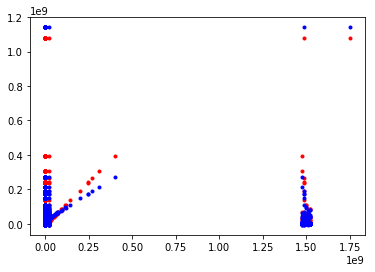

In [59]:
# Let's see the predicted test data points and real test data points.
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(Xtest,ytest,".",color='red',label='ytest predicted by model')
ax.plot(Xtest,y_model,'.',color='blue',label='ytest')


### Let's try PCA and then apply the linear regression again.

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
#make a dataframe
X_scaled = pd.DataFrame(X_scaled)
#change column names
X_scaled.columns = X.columns
X_scaled.head()

,date,visitNumber,visitStartTime,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,...,hitNumber,hour,minute,isInteraction,isEntrance,isExit,action_type,step,isFatal,hasSocialSourceReferral
0,0.128411,-0.160504,0.633628,1.012782,-0.417890,0.570576,-0.457248,-0.117426,-0.379099,-0.045839,...,-0.030043,0.911564,-1.694127,0.017323,0.050063,1.008738,-0.054036,0.017323,0.017323,-0.456973
1,0.128411,0.474301,0.632214,-0.987380,-0.307758,-1.752616,-0.303362,-0.003641,-0.299561,-0.045839,...,-0.030043,-0.206322,1.224025,0.017323,0.050063,-0.991338,-0.054036,0.017323,0.017323,-0.456973
2,0.128411,-0.160504,0.633830,-0.987380,-0.307758,0.570576,-0.303362,-0.117426,-0.271155,-0.045839,...,-0.030043,0.911564,1.338462,0.017323,0.050063,-0.991338,-0.054036,0.017323,0.017323,-0.456973
3,0.128411,-0.160504,0.631802,-0.987380,-0.307758,0.570576,-0.303362,-0.117426,-0.376258,-0.045839,...,-0.030043,-0.366020,-1.465253,0.017323,0.050063,-0.991338,-0.054036,0.017323,0.017323,-0.456973
4,0.128411,-0.160504,0.633124,-0.987380,-0.307758,0.570576,-0.303362,-0.117426,-0.231387,-0.045839,...,-0.030043,0.432470,1.109587,0.017323,0.050063,-0.991338,-0.054036,0.017323,0.017323,-0.456973


In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)   ### we can deduct to any dimension under 25, we tried 7 dimensions here.
pca.fit(X_scaled)
X_7D = pca.transform(X_scaled)

In [62]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_7D, y, random_state=1)

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()                       
model.fit(Xtrain, ytrain)               
y_model = model.predict(Xtest)
from sklearn.metrics import r2_score
r2_score(ytest, y_model)

0.533266487410725

### We can see that after reducting the X to 7 dimension, the R square value gets smaller, which means the linear regression model gets poorer. What about we reduct to other dimensions? ####

In [64]:

for d in np.arange(1, 25):
    pca = PCA(n_components = d)   ### we can reduct to any dimension under 25, we tried 7 dimensions here.
    pca.fit(X_scaled)
    X_nD = pca.transform(X_scaled)
    from sklearn.model_selection import train_test_split
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_nD, y, random_state=1)
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()                       
    model.fit(Xtrain, ytrain)               
    y_model = model.predict(Xtest)
    from sklearn.metrics import r2_score
    R_squre = r2_score(ytest, y_model)
    print(d,R_squre)

1 0.12206806075681054
2 0.12565163258800494
3 0.12795407619073784
4 0.13447191332048192
5 0.15563137052393927
6 0.5330381709850357
7 0.5332832806230219
8 0.7903088661906764
9 0.7841747032464179
10 0.838369017661513
11 0.8391682564929805
12 0.8397838379988652
13 0.8403888422748079
14 0.8406201595784952
15 0.849503657072745
16 0.9634541065122215
17 0.9660033173387776
18 0.9673211738158627
19 0.967308159533837
20 0.9672590514069386
21 0.9673340180435077
22 0.96733333444298
23 0.9673316068145358
24 0.9673316068145358


#### We can see that the R_squre value remains around 0.96 since the dimension number reaches 16. So when applying the PCA, we can set the n_components to 16.

## Supervised learning: Classification ###

In [65]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [66]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()                       
model.fit(Xtrain, ytrain)                  
y_model = model.predict(Xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

#### This is a very good accuracy score.

## Unsupervised learning: Dimension Reduction(PCA) →Clustering###

In [68]:
from sklearn.decomposition import PCA  
model = PCA(n_components=2)            
model.fit(X_scaled)                      
X_2D = model.transform(X_scaled)

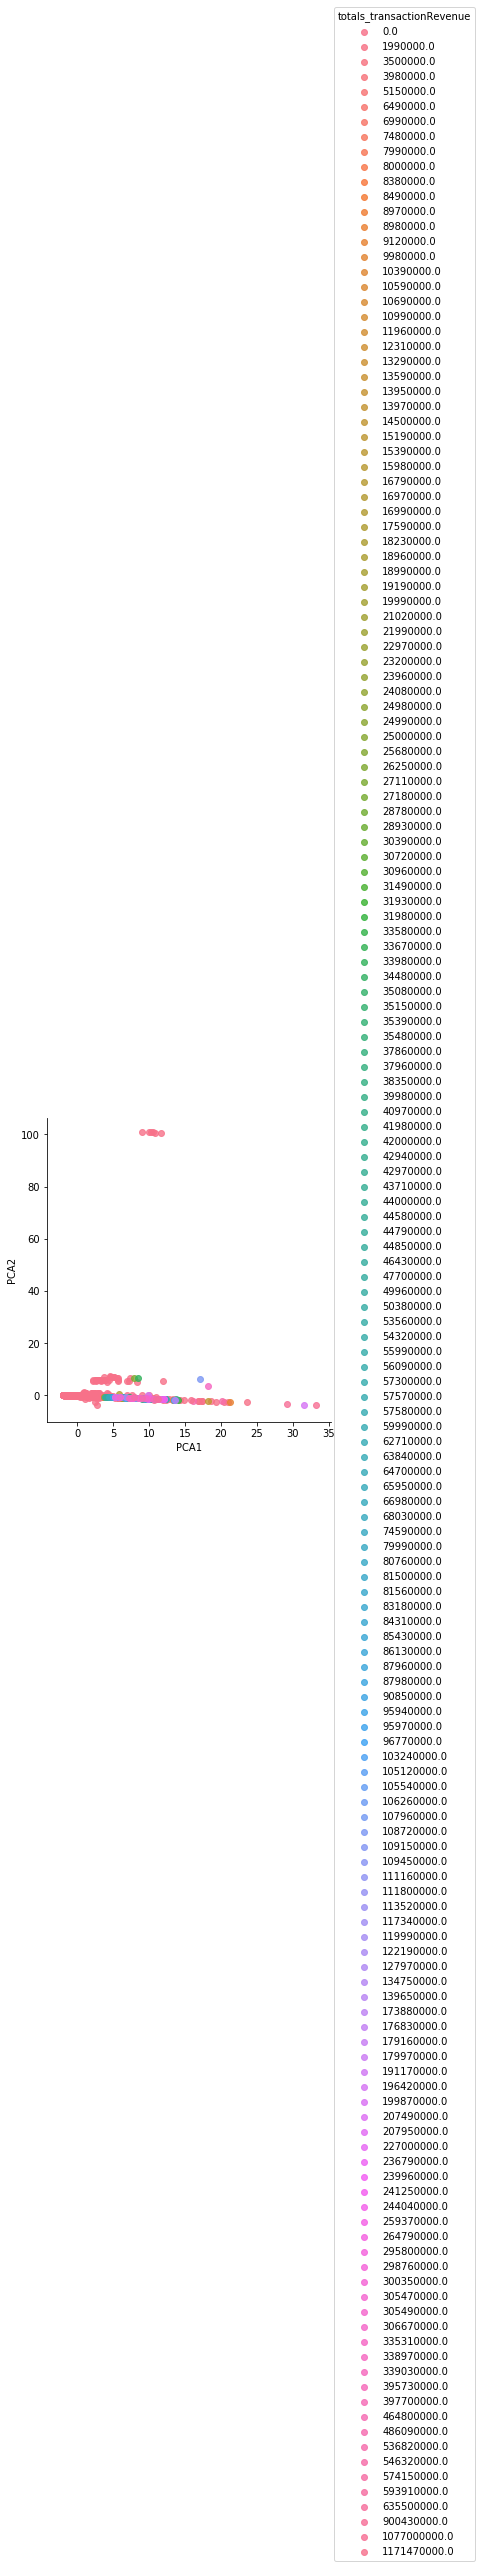

In [69]:
df['PCA1'] = X_2D[:, 0]
df['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='totals_transactionRevenue', data=df, fit_reg=False)

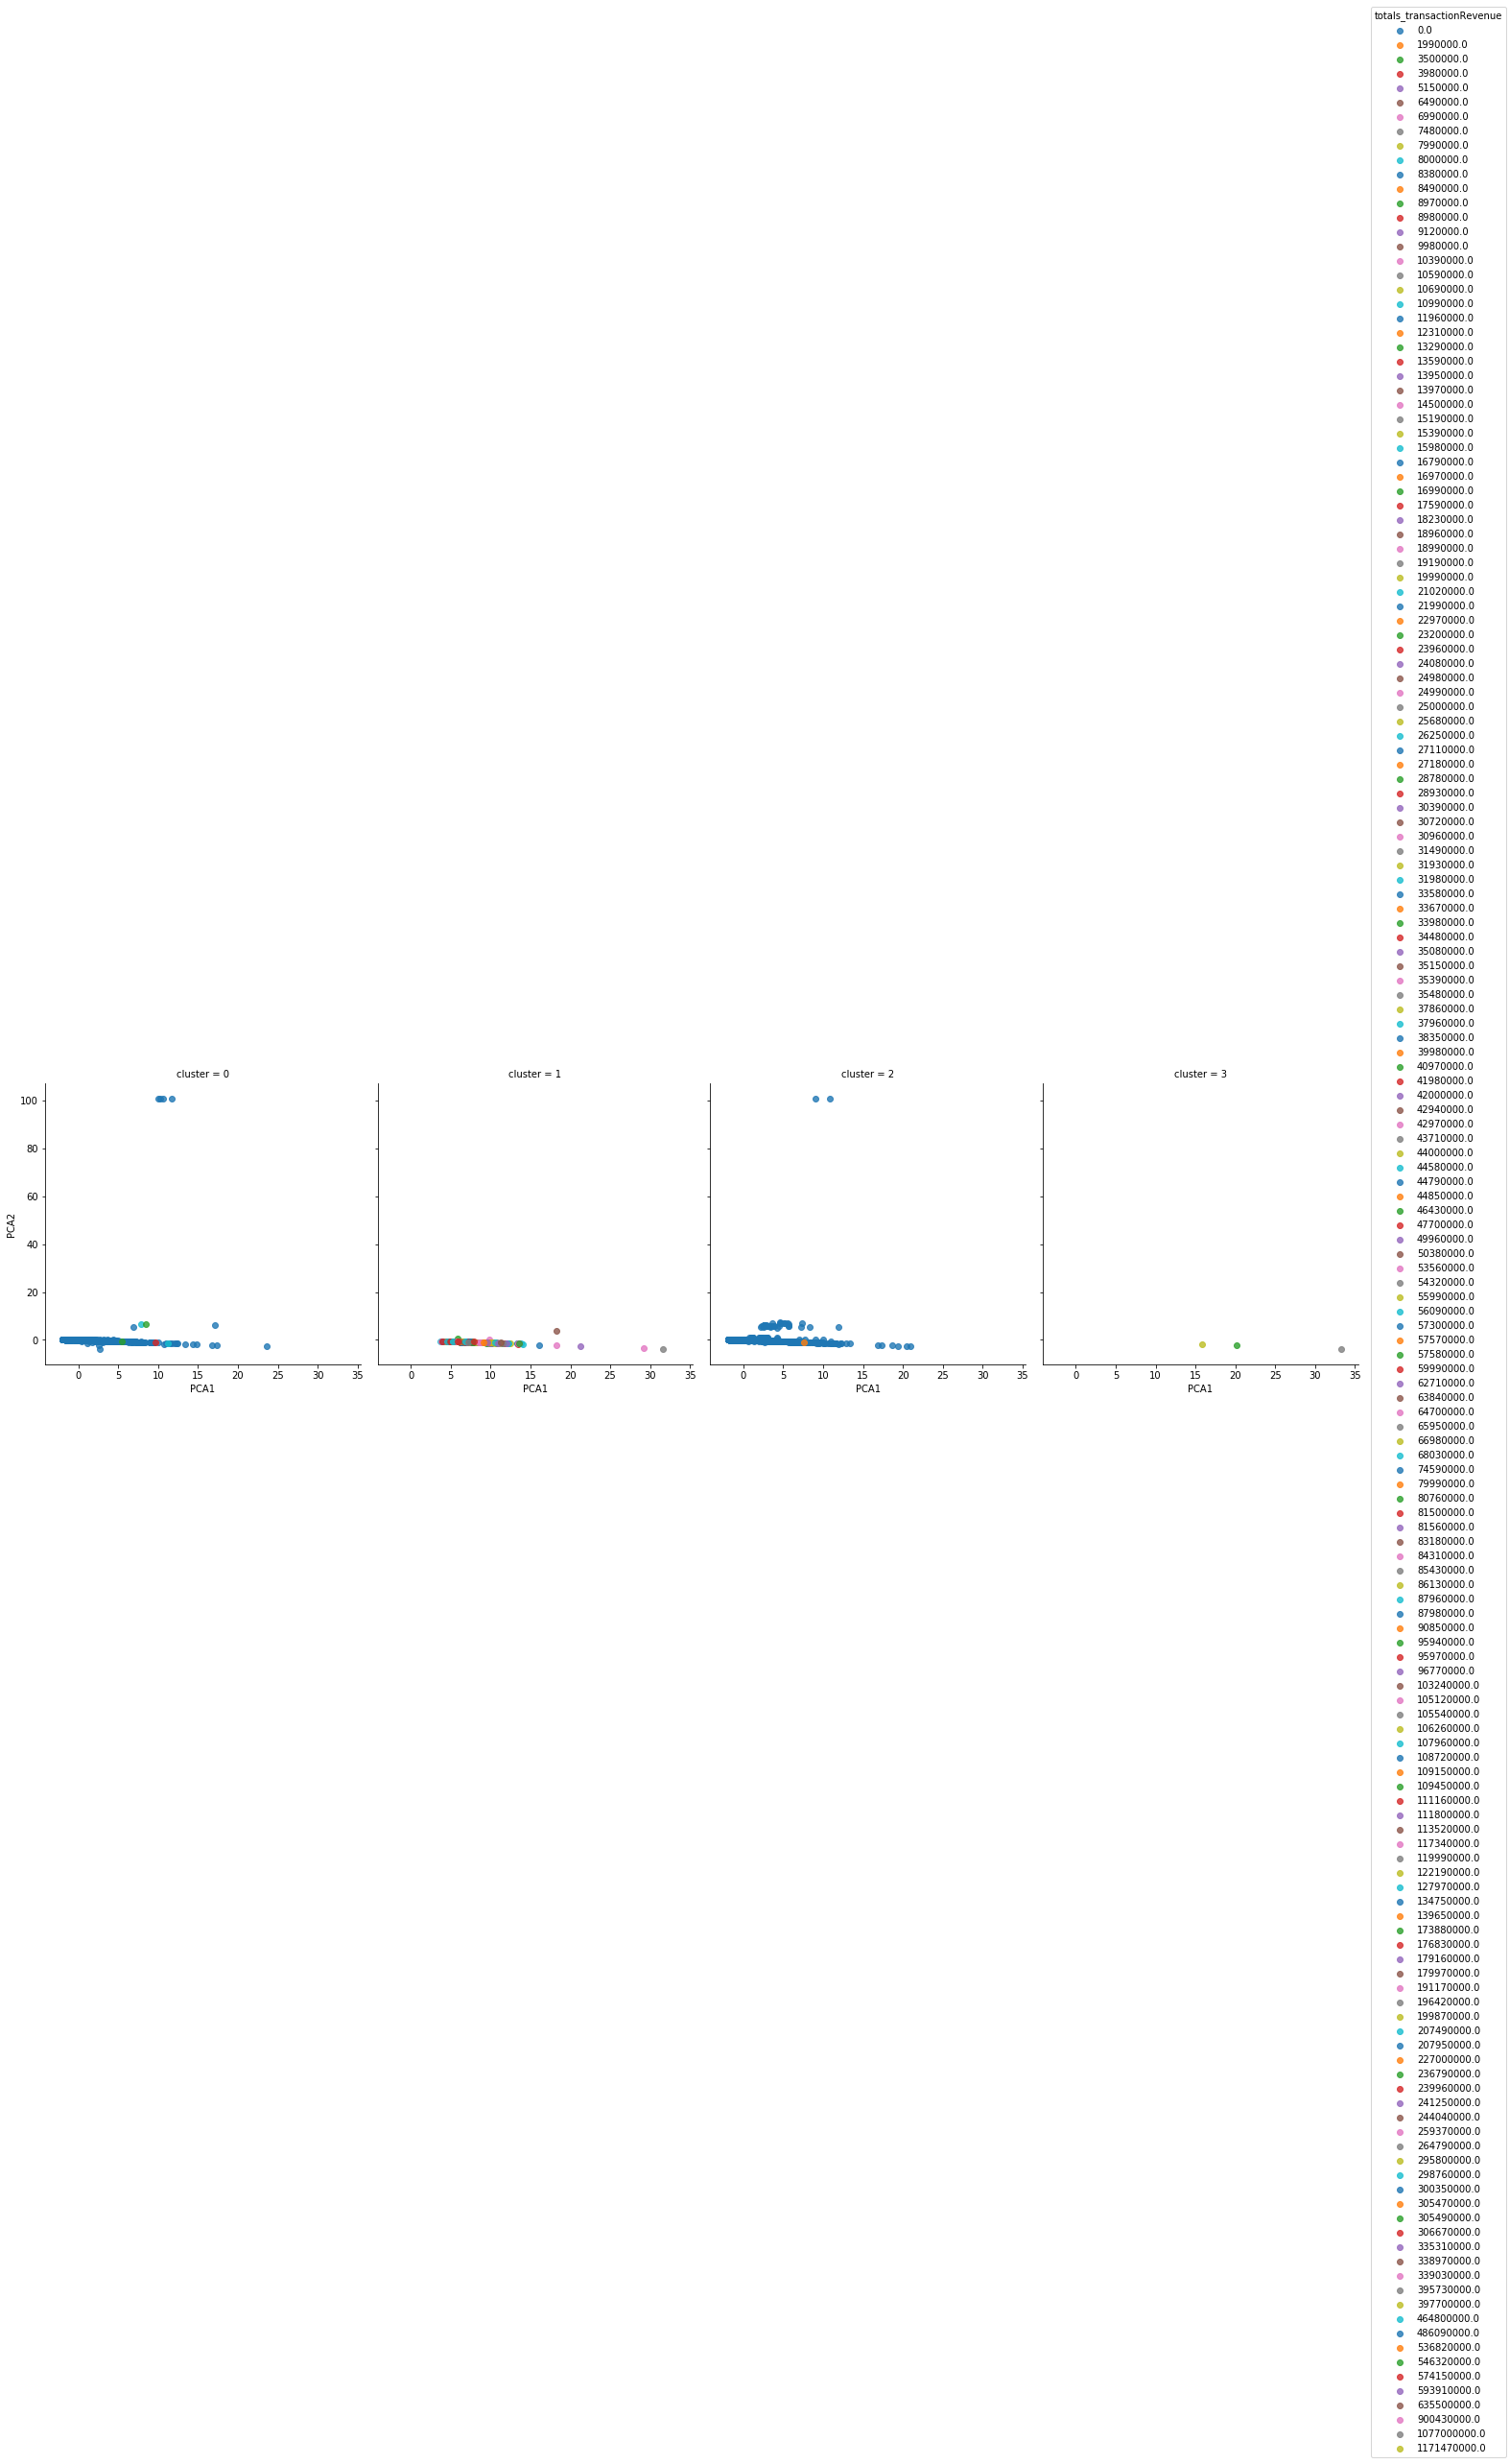

In [70]:
from sklearn.mixture import GaussianMixture                      
model = GaussianMixture(n_components=4, covariance_type='full')  
model.fit(X)                                                
y_gmm = model.predict(X) 
df['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=df, hue='totals_transactionRevenue', col='cluster', fit_reg=False, palette = 'tab10')

### From the result above, we can see that clustering will only give a relatively accurate prediction when the target value(totals_transactionRevenue) is zero, where the data falls into cluster 2. For the rest of the data, this model is very poor in terms of predicting the target value. In cluster 1, it has a wide range of data that could be divided into a huge number of clusters...It might because we reduct the dimensions to only 2 dimensions becasue of ease of visualization. From the analysis above, we know that the X data set could be reducted to 16 dimensions for the best result, let's try.

In [71]:
from sklearn.decomposition import PCA  
model = PCA(n_components=16)            ### 16 is the best components we know from previous analysis
model.fit(X_scaled)                      
X_16D = model.transform(X_scaled)
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_16D, y, random_state=1)
from sklearn.mixture import GaussianMixture                      
model = GaussianMixture(n_components=4, covariance_type='full')  
model.fit(Xtrain,ytrain)                                                
y_gmm = model.predict(Xtest)   
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_gmm)

0.028

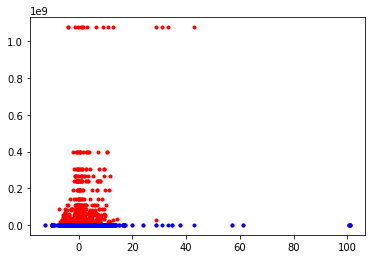

In [72]:
plt.plot(Xtest,ytest,'.',color='red')
plt.plot(Xtest,y_gmm,'.',color='blue')

### From the result above,the model only get about 2.8% of the test data predicted right. Let's try different numbers of cluster.

In [73]:
d = []
for i in np.arange(1,100):
    from sklearn.mixture import GaussianMixture                      
    model = GaussianMixture(n_components=4, covariance_type='full')  
    model.fit(Xtrain,ytrain)                                                
    y_gmm = model.predict(Xtest)   
    from sklearn.metrics import accuracy_score
    accuracy_score = accuracy_score(ytest, y_gmm)
    print(i,accuracy_score)

1 0.0492
2 0.4522
3 0.0282
4 0.028
5 0.01
6 0.0282
7 0.1902
8 0.031
9 0.4318
10 0.546
11 0.438
12 0.0296
13 0.3736
14 0.4682
15 0.3736
16 0.4786
17 0.0604
18 0.3776
19 0.4156
20 0.3706
21 0.454
22 0.3234
23 0.4668
24 0.4778
25 0.0164
26 0.1598
27 0.1964
28 0.0492
29 0.01
30 0.0282
31 0.1902
32 0.4072
33 0.4848
34 0.4572
35 0.01
36 0.346
37 0.1656
38 0.4072
39 0.0282
40 0.4844
41 0.028
42 0.4686
43 0.454
44 0.469
45 0.0916
46 0.4648
47 0.4668
48 0.056
49 0.3732
50 0.4562
51 0.1964
52 0.0492
53 0.454
54 0.4738
55 0.0528
56 0.0838
57 0.3204
58 0.1964
59 0.4778
60 0.0664
61 0.3038
62 0.4318
63 0.0528
64 0.1058
65 0.0
66 0.056
67 0.485
68 0.4778
69 0.4012
70 0.78
71 0.0344
72 0.378
73 0.3234
74 0.0192
75 0.4802
76 0.0568
77 0.2768
78 0.0568
79 0.4154
80 0.0644
81 0.432
82 0.071
83 0.454
84 0.454
85 0.4474
86 0.4154
87 0.0164
88 0.028
89 0.443
90 0.023
91 0.3854
92 0.1964
93 0.0186
94 0.421
95 0.0368
96 0.6142
97 0.049
98 0.435
99 0.1682


### From the result above, we can see that the GMM model of clustering doesn't do well in predicting the target value no matter how we ajust the hyperparameter(number of componets/clusters)##

# ###################Take home exam############################### #

#### Part 1: In your project you have been working with a bias dataset. Most probabely suupervised models were underfit. You should remember that this is a real dataset, and in real life most of the time you dont have access to clean and unbias dataset. In situations like this, none of the regression models will have a good fit for the dataset due to the large predence of the 0s. In the first part of this take-home exam, you are asked to be creative, and find a solution for this problem. 
#### For this dataset, you can break the problem, into a two-step machine learning model. 

#### First step is to classify the data points as positive revenue and zero revenue. This simply is a binary classification. You should remember that when you are dealing with biased datasets, accuracy is not a reliable scoring metric. So look for a robust scoring function. 

#### Next, you need to build a regression model to postprocess classification results. Here is a flow chart to show you the outline of the model. 

#### ![flowchart.png](attachment:flowchart.png)

In [276]:

df['revenue_dummy']=df['totals_transactionRevenue'].apply(lambda x: 'zero revenue'if x==0 else 'positive revenue')
df.columns

Index(['channelGrouping', 'date', 'visitNumber', 'visitStartTime',
       'totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews',
       'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactionRevenue',
       'totals_transactions', 'deviceCategory', 'operatingSystem', 'browser',
       'isMobile', 'city', 'campaign', 'source', 'keyword', 'medium',
       'isTrueDirect', 'slot', 'page', 'isVideoAd', 'value', 'hitNumber',
       'hour', 'minute', 'isInteraction', 'isEntrance', 'isExit', 'pageTitle',
       'searchKeyword', 'action_type', 'step', 'isFatal', 'socialNetwork',
       'hasSocialSourceReferral', 'contentGroup1', 'contentGroup2',
       'contentGroup3', 'PCA1', 'PCA2', 'cluster', 'revenue_dummy'],
      dtype='object')

In [288]:
X = df.select_dtypes(include=['float64','int64']).drop(['totals_transactionRevenue'],axis=1)
y_cla = df['revenue_dummy']
y = df['totals_transactionRevenue']
X_reg = df[df.revenue_dummy=='positive revenue'].select_dtypes(include=['float64','int64']
                                                              ).drop(['totals_transactionRevenue','totals_totalTransactionRevenue'],axis=1)
y_reg = df[df.revenue_dummy=='positive revenue']['totals_transactionRevenue']

In [289]:
Xtrain_cla, Xtest_cla, ytrain_cla, ytest_cla = train_test_split(X, y_cla, random_state=1)

In [290]:
from sklearn.naive_bayes import GaussianNB 
model_cla = GaussianNB()                       
model_cla.fit(Xtrain_cla, ytrain_cla)                  
ytest_cla_pred = model_cla.predict(Xtest_cla)
from sklearn.metrics import accuracy_score
accuracy_score(ytest_cla_pred, ytest_cla)

1.0

In [291]:
Xtrain_reg, Xtest_reg, ytrain_reg, ytest_reg = train_test_split(X_reg, y_reg, random_state=1)

In [292]:
from sklearn.linear_model import LinearRegression
model_reg = LinearRegression()                       
model_reg.fit(X_reg, y_reg)               
ytest_reg_pred = model_reg.predict(Xtest_reg)
from sklearn.metrics import r2_score
r2_score(ytest_reg_pred, ytest_reg)

0.7329999743117994

In [293]:
def model_final_predict(X):
    X1=X
    X1['RevenueDummy_predicted']=pd.Series(model_cla.predict(X))
    X1['Revenue_predicted']=pd.Series(model_reg.predict(X))
    for i in len(X1):
        if  X1['RevenueDummy_predicted'].iloc[i]=='zero revenue':
            X1['Revenue_predicted'].iloc[i]=0
    return X1['Revenue_predicted']

In [294]:
### We'll still use R squre to evaluate this model since the classification accuracy is 1.00
y_predicted=model_final_predict(X) 
r2_score(y,y_predicted)

ValueError: could not convert string to float: 'zero revenue'

# Part 2
In this part you will create a Python function ``plot_decision_boundary`` that will accepts a machine learning model, feature set ``X``, and target set ``y`` as input and will plot the decision boundary of the input machine learning model  on ``(X,y)``. The following is a sample run of this function: 

```Python
%matplotlib inline
# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)

# Plotting decision boundary
plot_decision_boundary(X, y, clf=svm)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')```

Sample output: 
![decision_boundary.png](attachment:decision_boundary.png)

In [156]:
from scipy import stats
from sklearn.svm import SVC 

In [166]:
%matplotlib inline
# Loading some example data
iris = load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm = svm.fit(X, y)

In [250]:
def plot_decision_boundary(X, y, clf, ax=None, plot_support=True):
    
    # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = .02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Spectral)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y,cmap=plt.cm.Spectral, edgecolors='black')
    plt.axis('tight')
    


Text(0.5,1,'SVM on Iris')

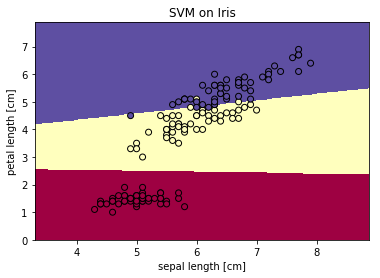

In [251]:
# Plotting decision boundary
plot_decision_boundary(X, y, clf=svm)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')